### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [ ]:
# Normalizar nomes de colunas para evitar erros
def limpar_colunas(df):
    df.columns = df.columns.str.strip().str.lower() #Limpa os espaços e padroniza em minúsculo
    return df

In [ ]:
# Aplicando a normalização a cada loja
loja = limpar_colunas(loja)
loja2 = limpar_colunas(loja2)
loja3 = limpar_colunas(loja3)
loja4 = limpar_colunas(loja4)

In [ ]:
# Agora todas as colunas estão em minúsculas e sem espaços
faturamento_t1 = loja['preço'].sum()
faturamento_t2 = loja2['preço'].sum()
faturamento_t3 = loja3['preço'].sum()
faturamento_t4 = loja4['preço'].sum()

In [ ]:
#Mostrar o total do faturamento
print(f'O faturamento da loja 1 foi de R${faturamento_t1}')
print(f'O faturamento da loja 2 foi de R${faturamento_t2}')
print(f'O faturamento da loja 3 foi de R${faturamento_t3}')
print(f'O faturamento da loja 4 foi de R${faturamento_t4}')

O faturamento da loja 1 foi de R$1534509.12
O faturamento da loja 2 foi de R$1488459.06
O faturamento da loja 3 foi de R$1464025.03
O faturamento da loja 4 foi de R$1384497.58


In [ ]:
#unindo o faturamento total de cada loja
faturamento_total = faturamento_t1 + faturamento_t2 + faturamento_t3 + faturamento_t4
print(f'O faturamento total foi de R${faturamento_total}')

O faturamento total foi de R$5871490.79


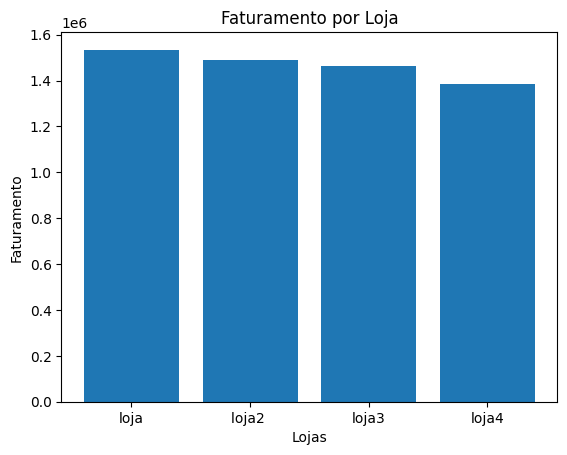

In [ ]:
#criando o gráfico do faturamento de cada loja
import matplotlib.pyplot as plt

lojas = ['loja', 'loja2 ', 'loja3', 'loja4']
faturamento = [faturamento_t1, faturamento_t2, faturamento_t3, faturamento_t4]

plt.bar(lojas, faturamento)
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.title('Faturamento por Loja')
plt.show()

# 2. Vendas por Categoria


In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

In [4]:
# Ver as colunas de forma isolada
print(loja.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


In [28]:
#A plicar a normalização em todas as lojas, renomeando o nome das colunas
def limpar_colunas(df):
    df.columns = df.columns.str.strip().str.lower()
    return df


In [33]:

print(len(loja['categoria do produto']))


2359


In [25]:
# Criar as variáveis que vão receber as listas com a categoria dos produtos.
# O value_counts vai contar quantas vezes a categoria aparece no dataset de cada loja
# O reset_index vai converter o indice da coluna para facilitar a manipulaçã dos dados.
vendas_categoria_loja = loja['categoria do produto'].value_counts().reset_index()
vendas_categoria_loja.columns = ['categoria do produto', 'quantidade_vendas']

vendas_categoria_loja2 = loja2['categoria do produto'].value_counts().reset_index()
vendas_categoria_loja2.columns = ['categoria do produto', 'quantidade_vendas']

vendas_categoria_loja3 = loja3['categoria do produto'].value_counts().reset_index()
vendas_categoria_loja3.columns = ['categoria do produto', 'quantidade_vendas']

vendas_categoria_loja4 = loja4['categoria do produto'].value_counts().reset_index()
vendas_categoria_loja4.columns = ['categoria do produto', 'quantidade_vendas']

In [29]:
# Exibir as categorias mais vendidas de cada loja, com duas colunas categoria e vendas
print("\n📦 Categorias mais vendidas - Loja 1")
print(vendas_categoria_loja)

print("\n📦 Categorias mais vendidas - Loja 2")
print(vendas_categoria_loja2)

print("\n📦 Categorias mais vendidas - Loja 3")
print(vendas_categoria_loja3)

print("\n📦 Categorias mais vendidas - Loja 4")
print(vendas_categoria_loja4)


📦 Categorias mais vendidas - Loja 1
    categoria do produto  quantidade_vendas
0                 moveis                465
1            eletronicos                448
2             brinquedos                324
3       eletrodomesticos                312
4        esporte e lazer                284
5  instrumentos musicais                182
6                 livros                173
7  utilidades domesticas                171

📦 Categorias mais vendidas - Loja 2
    categoria do produto  quantidade_vendas
0                 moveis                442
1            eletronicos                422
2             brinquedos                313
3       eletrodomesticos                305
4        esporte e lazer                275
5  instrumentos musicais                224
6                 livros                197
7  utilidades domesticas                181

📦 Categorias mais vendidas - Loja 3
    categoria do produto  quantidade_vendas
0                 moveis                499
1        

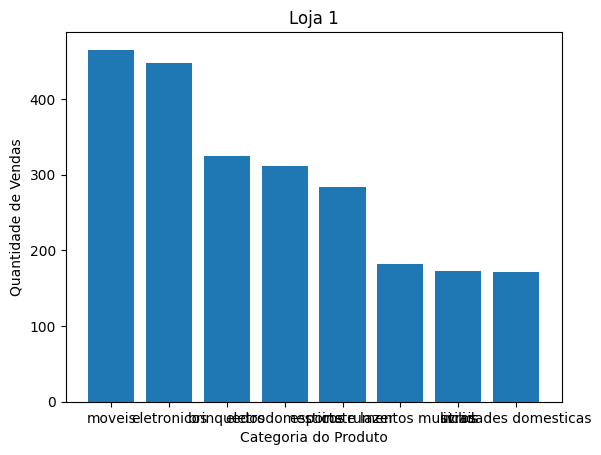

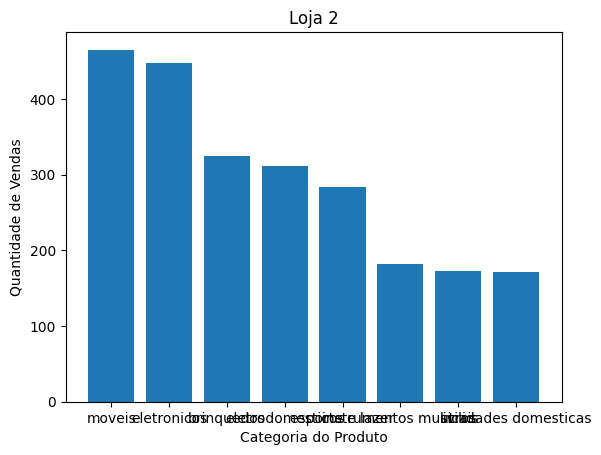

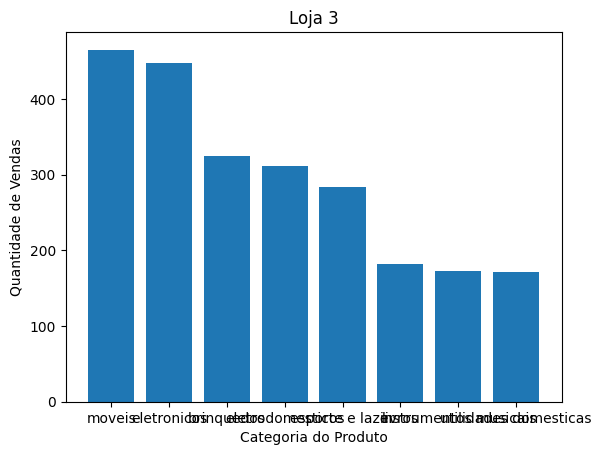

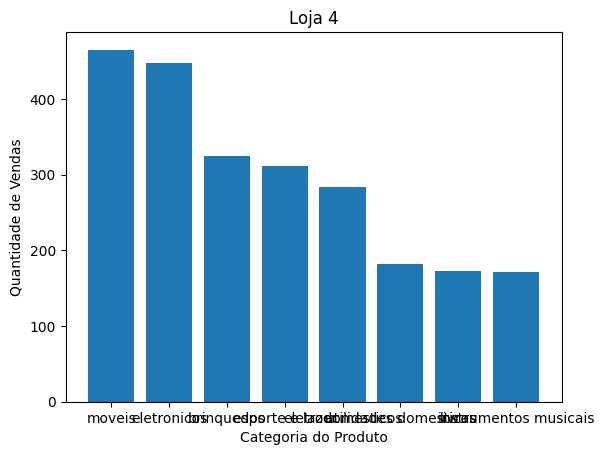

In [39]:
import matplotlib.pyplot as plt

plt.bar(vendas_categoria_loja['categoria do produto'], vendas_categoria_loja['quantidade_vendas'])
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.title('Loja 1')
plt.show()

plt.bar(vendas_categoria_loja2['categoria do produto'], vendas_categoria_loja['quantidade_vendas'])
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.title('Loja 2')
plt.show()

plt.bar(vendas_categoria_loja3['categoria do produto'], vendas_categoria_loja['quantidade_vendas'])
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.title('Loja 3')
plt.show()

plt.bar(vendas_categoria_loja4['categoria do produto'], vendas_categoria_loja['quantidade_vendas'])
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.title('Loja 4')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


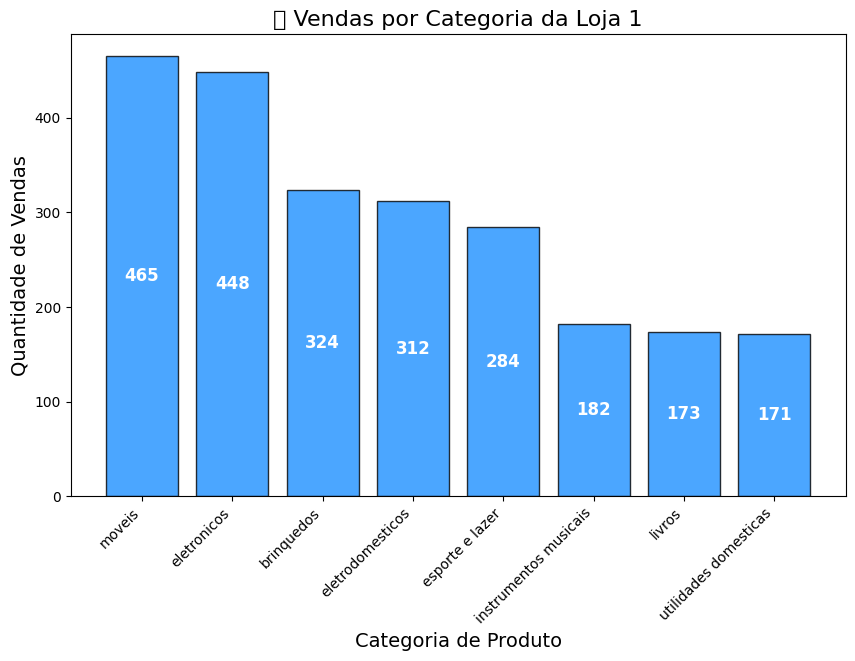

In [40]:
# Os gráficos acima ficaram com a parte da descrição das barras com os nomes de cada uma
# se sobrepondo umas as outras. Com a ajudinha do Copilot, criei uma forma de visualizar
# os valores que desse para ler o que é cada categoria em cada barra

import matplotlib.pyplot as plt

# Dados de exemplo
categorias = vendas_categoria_loja['categoria do produto']
quantidades = vendas_categoria_loja['quantidade_vendas']

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.bar(categorias, quantidades, color='dodgerblue', edgecolor='black', alpha=0.8)

# Adicionando os valores dentro das barras
for barra in barras:
    altura = barra.get_height()  # Obtém a altura da barra
    plt.text(barra.get_x() + barra.get_width()/2, altura/2, f'{int(altura)}', ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Configuração do gráfico
plt.title('📊 Vendas por Categoria da Loja 1', fontsize=16)
plt.xlabel('Categoria de Produto', fontsize=14)
plt.ylabel('Quantidade de Vendas', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotacionando os nomes das categorias para melhor visualização

# Exibir o gráfico
plt.show()


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
